Digite o local dos arquivos: C:\Users\bruno\Documents\avaliações_fazer\
Digite o local para saida dos dados: C:\Users\bruno\Documents\avaliações_fazer\feito
Copie o caminho da autoavaliação e cole abaixo: "C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx"
C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


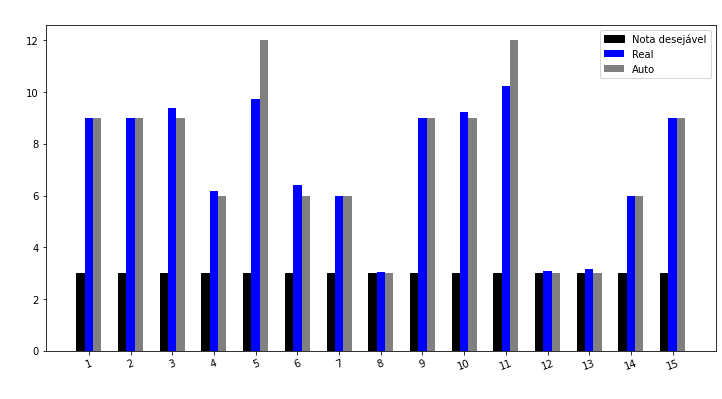

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


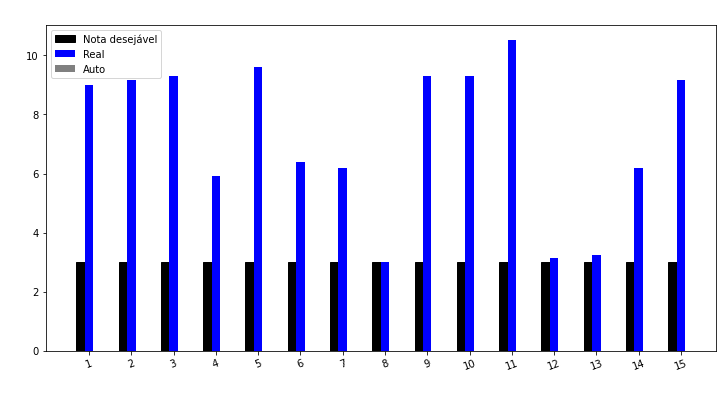

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


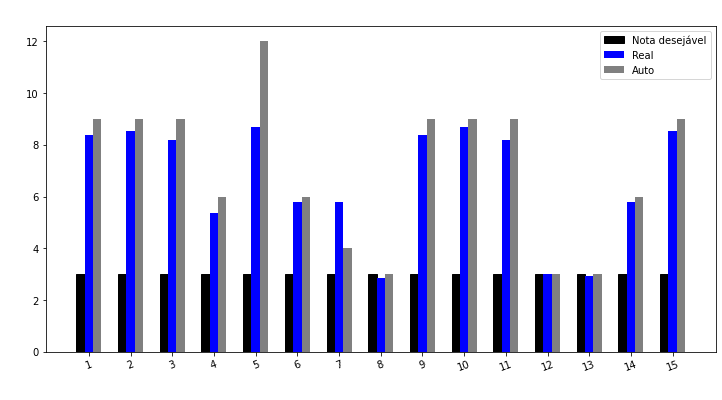

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


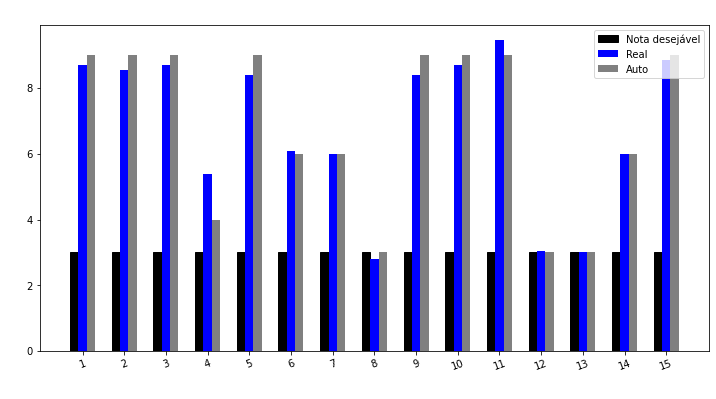

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


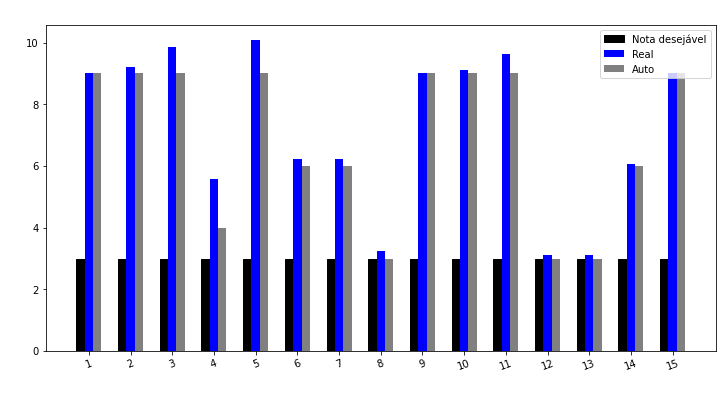

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


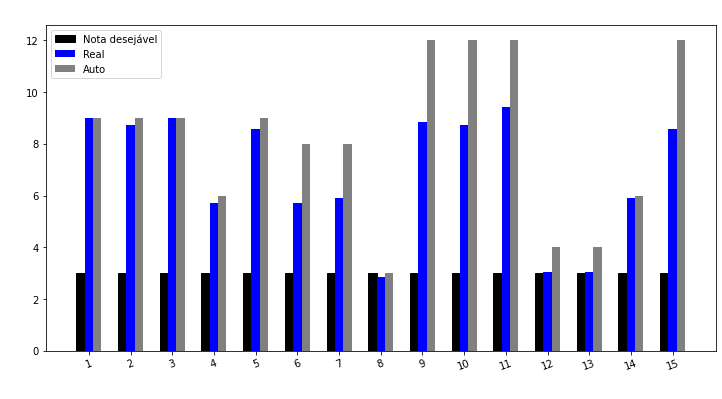

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


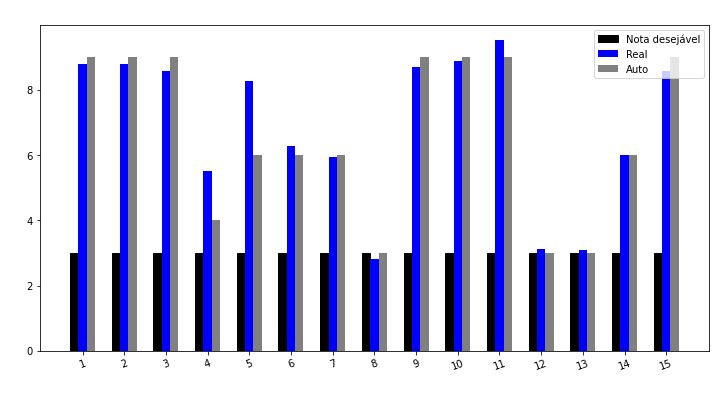

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


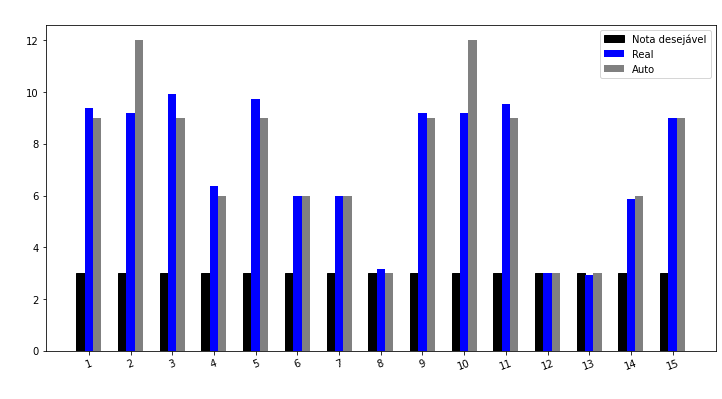

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


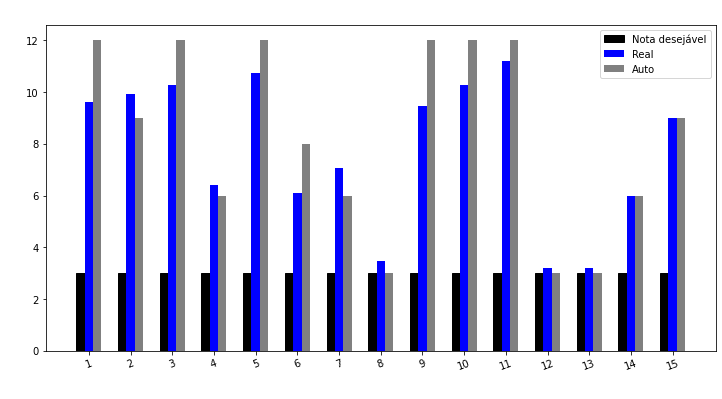

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


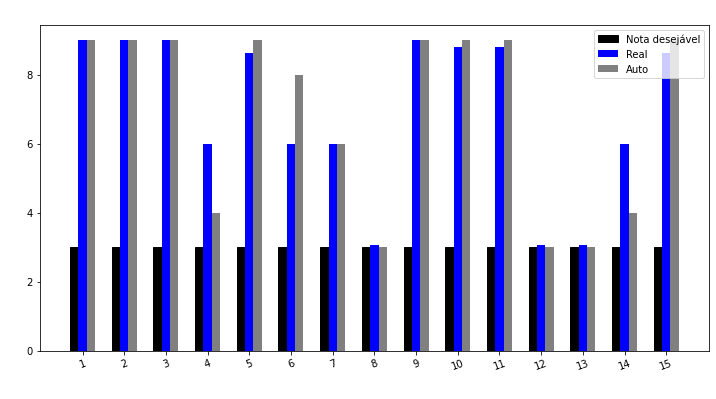

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


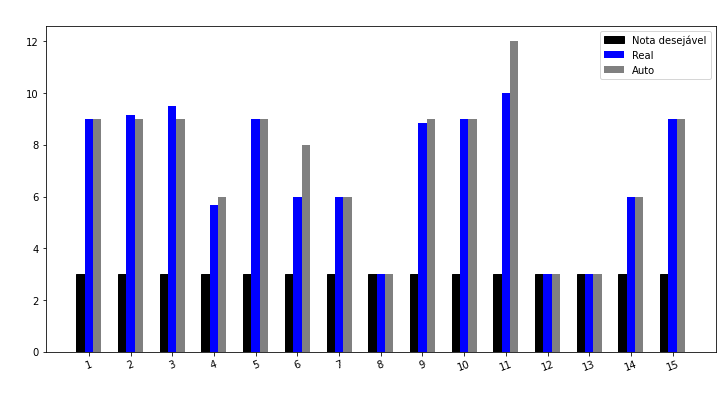

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


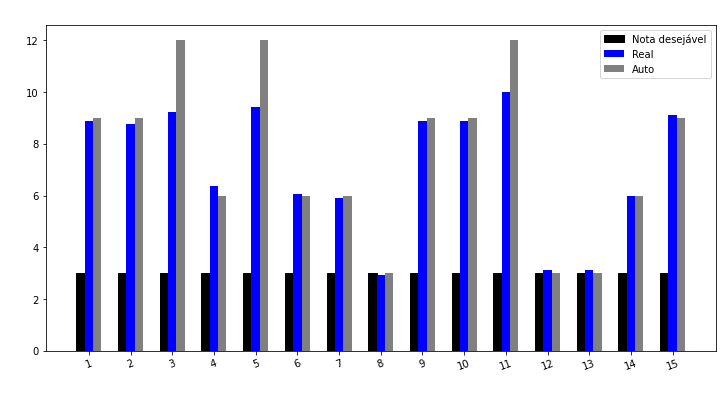

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


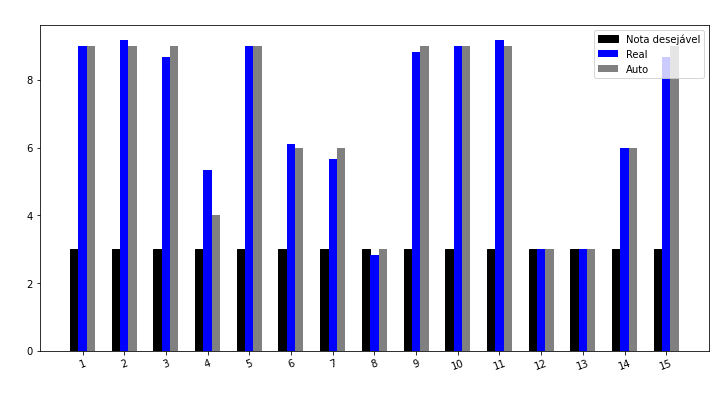

C:\Users\bruno\Documents\avaliações_fazer\autoavaliação\Autoavaliaç¦o_Cargo_ Assistente _ trainee_Avaliaç¦o por ciclo_2021_2022(1-21).xlsx


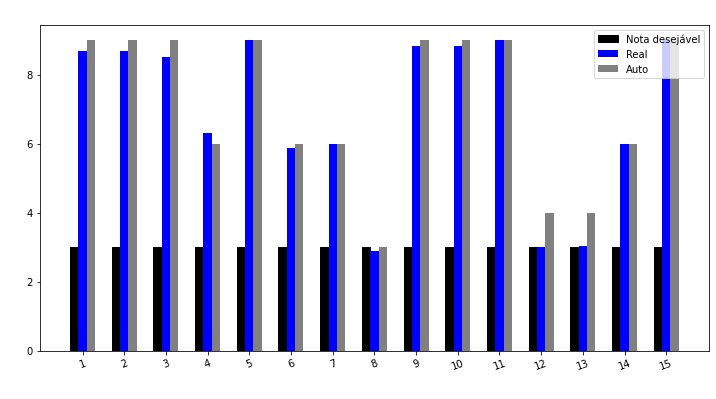

PROCESSO FINALIZADO COM SUCESSO!


In [16]:
import pandas as pd
import os
import glob
import numpy as np
from ConstructionGraph import contruction_graph

def avaliacao_assistente(locale_files, name_avaliado, locale_autoavaliacao, locale_export):
    pesos_assistente = [3,3,3,2,3,2,2,1,3,3,3,1,1,2,3]
    nota_assistente = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
    df_avaliacao = pd.read_excel(locale_files, engine="openpyxl")
    
    index_df = np.arange(1, 16)
    # Transforma em um dataframe a média dos valores
    df_avaliacao = pd.DataFrame(df_avaliacao.mean(numeric_only=True)) 

    #Reseta o index, exclui dados inuteis, adiciona o novo index e renomeia as colunas
    df_avaliacao.reset_index(inplace=True)
    df_avaliacao.drop(df_avaliacao.loc[df_avaliacao['index']=='ID'].index, inplace=True)
    df_avaliacao.drop(df_avaliacao.loc[df_avaliacao['index']=='Nome'].index, inplace=True)
    df_avaliacao.index = index_df
    df_avaliacao.columns = ['Competencia', 'Nota Real']
    df_avaliacao['Peso'] = pesos_assistente
    df_avaliacao['Nota desejada'] = nota_assistente
    df_avaliacao['Ponto desejado'] = df_avaliacao['Peso'] * df_avaliacao['Nota desejada'] 
    df_avaliacao['Porcentagem desejado'] = df_avaliacao['Ponto desejado']/df_avaliacao['Ponto desejado'].sum() *100
    df_avaliacao['Ponto Real'] = df_avaliacao['Nota Real'] * df_avaliacao['Peso']
    df_avaliacao['Porcentagem Real'] = df_avaliacao['Ponto Real']/df_avaliacao['Ponto Real'].sum() *100
    
    autoavaliacao(locale_autoavaliacao, name_avaliado, df_avaliacao, pesos_assistente, index_df, locale_export)

    
def autoavaliacao(locale_autoavaliacao, name_avaliado, df_avaliacao, pesos, index_df, locale_export):
   
    df = pd.read_excel(locale_autoavaliacao, engine='openpyxl')
    df = df.loc[df['Avaliador:'] == name_avaliado]
    df = pd.DataFrame(df.mean(numeric_only=True)) 

    df.reset_index(inplace=True)
    df.drop(df.loc[df['index']=='ID'].index, inplace=True)
    df.drop(df.loc[df['index']=='Nome'].index, inplace=True)
    df.index = index_df
    df.columns = ['Competencia', 'Nota Autoavaliação']
    print(locale_autoavaliacao)

    #Criando a coluna ponto
    df['Ponto Autoavaliação'] = df['Nota Autoavaliação'] * pesos
    df['Porcentagem Autoavaliação'] = df['Ponto Autoavaliação']/df['Ponto Autoavaliação'].sum() *100
#     if len(name_avaliado) > 31:
#         name_avaliado = name_avaliado[:32]
    
    df_completo= pd.merge(df_avaliacao, df, how = 'inner', on = 'Competencia')
 
    df_completo = df_completo.reindex(columns=["Competencia", "Peso", "Nota desejada", "Ponto desejado", "Porcentagem desejado", "Nota Real", "Ponto Real", "Porcentagem Real", "Nota Autoavaliação", "Ponto Autoavaliação", "Porcentagem Autoavaliação"])
    locale_file = f"{locale_export}\\{name_avaliado}.xlsx"
    df_completo.to_excel(locale_file, sheet_name=f'{name_avaliado}', index=False)
    
    contruction_graph(locale_export, locale_file, df_completo, name_avaliado)


def avaliacao_senior(locale, name_avaliado, locale_autoavaliacao_senior, locale_export):
    
    pesos_senior = [3,3,3,3,3,2,3,3,3,3,3,2,2,3,3,3,3]
    nota_senior = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
    
    index_df = np.arange(1,18)
    df_avaliacao = pd.read_excel(locale, engine="openpyxl")
    # Transforma em um dataframe a média dos valores
    df_avaliacao = pd.DataFrame(df_avaliacao.mean(numeric_only=True)) 

    #Reseta o index, exclui dados inuteis, adiciona o novo index e renomeia as colunas
    df_avaliacao.reset_index(inplace=True)
    df_avaliacao.drop(df_avaliacao.loc[df_avaliacao['index']=='ID'].index, inplace=True)
    df_avaliacao.drop(df_avaliacao.loc[df_avaliacao['index']=='Nome'].index, inplace=True)
    df_avaliacao.index = index_df
    df_avaliacao.columns = ['Competencia', 'Nota Real']
    df_avaliacao['Peso'] = pesos_senior
    df_avaliacao['Nota desejada'] = nota_senior
    df_avaliacao['Ponto desejado'] = df_avaliacao['Peso'] * df_avaliacao['Nota desejada'] 
    df_avaliacao['Porcentagem Desejada'] =  df_avaliacao['Ponto desejado']/df_avaliacao['Ponto desejado'].sum() *100

    #Criando a coluna ponto
    df_avaliacao['Ponto Real'] = df_avaliacao['Nota Real'] * df_avaliacao['Peso'] 
    df_avaliacao['Porcentagem Real'] = df_avaliacao['Ponto Real']/df_avaliacao['Ponto Real'].sum() *100
    autoavaliacao(locale_autoavaliacao_senior, name_avaliado, df_avaliacao, pesos_senior, index_df, locale_export)


locale_files = input("Digite o local dos arquivos: ")

files = glob.glob(f'{locale_files}//*.xlsx')
locale_export = input("Digite o local para saida dos dados: ")

locale_autoavaliacao = input('Copie o caminho da autoavaliação e cole abaixo: ')[1:-1]

while True:
    try: 
        answer = str(input("Você deseja avaliar: [1] - Senior \n [2] - Assistente"))
    except:
        print('Escolha uma opção válida.')
    if answer == 1 or answer == 2:
        break
    

for i in range(len(files)):

    # Extrair nome do arquivo
    basename = os.path.basename(files[i])
    file_name = os.path.splitext(basename)[0]

    #Condição para se é assistente ou encarregado, se verdadeiro: é SÊNIOR, senão, assistente
    boolean_competencia = bool
    
    pos_chars = [pos for pos, char in enumerate(file_name) if char == "_"][:2]
    if len(file_name[pos_chars[0]+2:pos_chars[1]]) > 31:
        name_avaliado =  file_name[pos_chars[0]+2:pos_chars[1]][:31]
    else:
        name_avaliado = file_name[pos_chars[0]+2:pos_chars[1]]
    
   
    avaliacao_senior(files[i], name_avaliado, locale_autoavaliacao)
    avaliacao_assistente(files[i], name_avaliado, locale_autoavaliacao, locale_export)
    
    




print("PROCESSO FINALIZADO COM SUCESSO!")


In [ ]:
C:\Users\bruno\Documents\avaliações_fazer\feito